1-01
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
Name: 266.0, dtype: float64


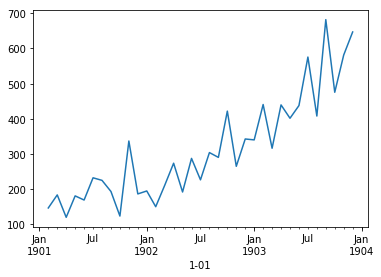

AttributeError: 'Series' object has no attribute 'info'

In [8]:
from pandas import datetime
from pandas import DataFrame
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('../data/ts-test.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

print(series.head())
series.plot()
pyplot.show()




In [9]:
print(series.info())

AttributeError: 'Series' object has no attribute 'info'

/home/cartest/anaconda3/envs/py3Env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


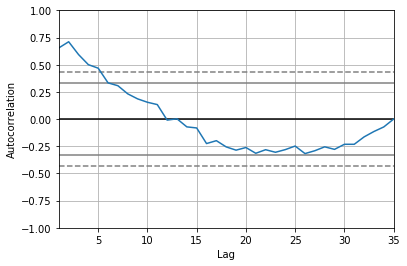

In [5]:

autocorrelation_plot(series)
pyplot.show()


In [6]:

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.266.0   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -188.279
Method:                       css-mle   S.D. of innovations             59.834
Date:                Thu, 05 Apr 2018   AIC                            390.559
Time:                        16:57:30   BIC                            401.243
Sample:                    03-01-1901   HQIC                           394.203
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.5140      3.340      4.046      0.000       6.968      20.060
ar.L1.D.266.0    -1.1471      0.171     -6.709      0.000      -1.482      -0.812
ar.L2.D.266.0    -0.6961      0.265     

/home/cartest/anaconda3/envs/py3Env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/cartest/anaconda3/envs/py3Env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/home/cartest/anaconda3/envs/py3Env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


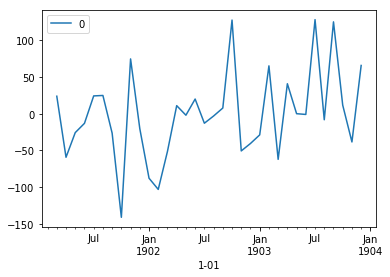

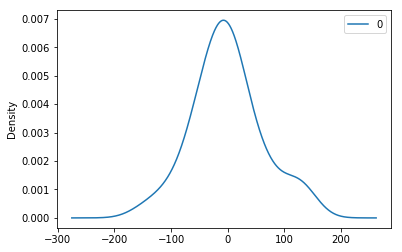

In [7]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()